# I. Introduction

This exercise explores the relative speed of hash functions (via Python's 'set' data type) versus other search functions.  

First we import helpful packages.

In [1]:
import random
import string
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
#%matplotlib inline

# II. Generating the Test Data

First, we instantiate a random (re: unsorted) list of 100,000 10-character strings

In [2]:
random.seed(6)
unsorted_list = ["".join(random.choices(string.ascii_lowercase, k=10)) for _ in range(100000)]

Then we generate a set of the same strings.

In [3]:
unsorted_set = set(unsorted_list)

A quick check to ensure there are no dupes within the list of names:

In [4]:
len(unsorted_list) == len(unsorted_set)

True

Confirmed!

Next we want to create a sorted list of the same set of names.  After exploring potential sort functions, something with a similar big O to MergeSort seems preferred for longer lists (best case: O(n), average & worst case: O(nlog(n))) as compared with QuickSort.

Python's built-in sorted() function uses TimSort which has the same Big O progression as MergeSort, and does _not_ sort the list in place (what we want) so we'll use that for simplicity.

In [5]:
sorted_list = sorted(unsorted_list)

Lastly, we want to identify the 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th elements in both the unsorted list and the sorted list so we can search for them later.

In [6]:
# defines a list of the indeces we want to gather.  Will use this list later too.
indeces = [9999, 29999, 49999, 69999, 89999, 99999]

# gathers the names to search for for each list
unsorted_search_names = []
sorted_search_names = []
for i in indeces:
    unsorted_search_names.append(unsorted_list[i])
    sorted_search_names.append(sorted_list[i])

In [7]:
search_test_names = {}
search_test_names['unsorted_list'] = unsorted_search_names
search_test_names['sorted_list'] = sorted_search_names

In [8]:
# just to confirm
search_test_names

{'unsorted_list': ['vhndnhawox',
  'tvpcbaynaj',
  'vihgvqofxl',
  'bcrcrdgzoj',
  'yshzaywwir',
  'pqjnxxclve'],
 'sorted_list': ['coxygpkxgg',
  'hsymkajste',
  'myccogvwfe',
  'sejawnpgdf',
  'xkivmhshqy',
  'zzzhvtkcqf']}

# III. Defining the Sort Functions

Next I leveraged the linear and binary search function definitions from our earlier assignment (making some slight ammendments to ignore the loop counters since we're measuring time and not iteration as before).

In [9]:
## Defines the Linear Search Test Function
def linear_search(list, item):
    # to indentify the index
    index = 0
    while index < len(list):
        if list[index] == item:
            return "Index of element is ",index
        else:
            index = index + 1
    # If no more available guesses, item is not in the list
    return None

In [10]:
## Defines the Binary Search Test Function
def binary_search(list, item):
  # lower & upper _limit keep track of which part of the list contain the remaining viable guesses.
  lower_limit = 0
  upper_limit = len(list) - 1

  # While there are still available guesses ...
  while lower_limit <= upper_limit:
    
    # identify the current middle element
    mid_point = (lower_limit + upper_limit) // 2
    guess = list[mid_point]
    
    # If guess is correct
    if guess == item:
      # guess doesn't matter, loop counter demonstrates scaling along with search time
      return mid_point

    # If guess is too high
    if guess > item:
      upper_limit = mid_point - 1

    # If guess is too low
    else:
      lower_limit = mid_point + 1  
    
  # If no more available guesses, item is not in the list
  return None

# IV. Search Method Time Testing

Next I instantiated a list to capture the results of the time testing

In [11]:
time_results = []

Now, I define two functions to conduct the time testing: 1 for searching the lists and 1 for searching the set.

In [12]:
def list_time_testing(search_function,method_label,test_list,search_for_list):
    indeces = [9999, 29999, 49999, 69999, 89999, 99999]
    for i in range(len(search_for_list)):
        item = search_for_list[i]
        start = time.perf_counter()
        search_function(test_list,item)
        end = time.perf_counter()
        search_time = (end - start)*1000
        time_results.append({'Search Function':method_label
                              ,'Index':indeces[i]
                              ,'Search Time':search_time})

In [13]:
def set_time_testing(test_set,search_for_list):
  for i in range(len(search_for_list)):
      item = search_for_list[i]
      start = time.perf_counter()
      test_set.remove(item)
      end = time.perf_counter()
      search_time = (end - start)*1000
      time_results.append({'Search Function':"Set '.remove()'"
                          ,'Index':'NA'
                          ,'Search Time':search_time})

Finally, I run the time testing, searching for 
1. the 6 'unsorted' search names in the unsorted list
2. the 6 'sorted' search names in the sorted list
3. and all 12 names in the set to set a range of hashed values

In [14]:
list_time_testing(linear_search,'Linear Search for Unsorted List',unsorted_list,search_test_names['unsorted_list'])
list_time_testing(binary_search,'Binary Search for Sorted List',sorted_list,search_test_names['sorted_list'])
set_time_testing(unsorted_set,search_test_names['unsorted_list'])
set_time_testing(unsorted_set,search_test_names['sorted_list'])

And for easier data exploration and visualization, I covert the time_results list of dictionaries into a pandas dataframe.

In [15]:
results_df = pd.DataFrame(time_results)

# V. Results Visualizations & Discussion

Firstly, our results are small enough that we can just take a look at the raw data is to get an initial take on the search times of the various methods (linear, binary, hash function) 

In [16]:
results_df

,Index,Search Function,Search Time
0,9999,Linear Search for Unsorted List,1.6275
1,29999,Linear Search for Unsorted List,4.9647
2,49999,Linear Search for Unsorted List,16.7084
3,69999,Linear Search for Unsorted List,22.5602
4,89999,Linear Search for Unsorted List,31.9266
5,99999,Linear Search for Unsorted List,41.3065
6,9999,Binary Search for Sorted List,0.0148
7,29999,Binary Search for Sorted List,0.0101
8,49999,Binary Search for Sorted List,0.0012
9,69999,Binary Search for Sorted List,0.0108


Linear and binary search times should be some function of the indeces of the search values.  However, sets don't have indeces and we have no reason to think that one string should take particularly longer to search for than another within a set.  Thus, out of curiosity, I wanted to calculate the mean of the search time results for the set.

In [17]:
results_df.loc[results_df['Index'] == 'NA', 'Search Time'].mean()

0.0008249999989828893

The average 'search' time leveraging hash functions for sets is smaller than all the linear search times and smaller than all but one of the binary search times (for the 'middle' element of the sorted list).  Depending on the precise run of this code, sometimes the average hash function search is faster than ALL linear _and_ binary search times.

Next we graph the results looking at categorical scatterplots of the data.

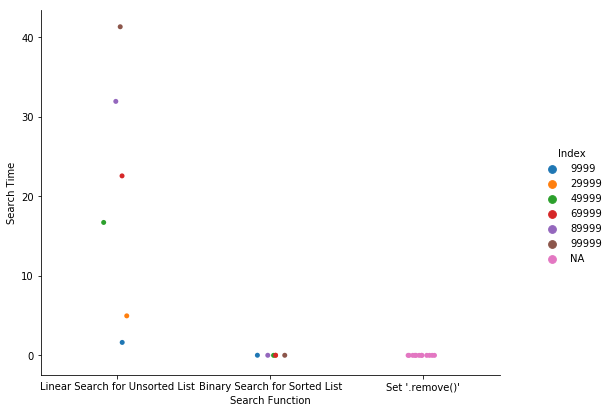

In [40]:
p1 = sns.catplot(x="Search Function", y="Search Time", hue="Index", data=results_df, aspect=1)
p1.fig.set_size_inches(9,6)

Firstly, it's clear that linear search generally takes significantly longer than both binary search and the set's hash function.  In addition, linear search time increases with the index of the element being searched for, as to be expected.

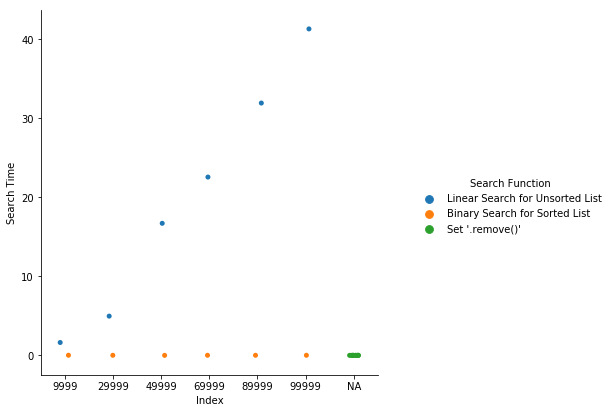

In [41]:
p2 = sns.catplot(x="Index", y="Search Time"
            , hue = "Search Function", data=results_df)
p2.fig.set_size_inches(9,6)

This graph shows the same results, just with the index of the element being searched for on the x-axis and the color-coding representing the search method.  This graph makes it even more clear that linear search times increase linearly with the index of the element being searched for.

However, because linear search takes so much longer than both binary search and the set's hash function, it's difficult to see any search time discrepency among the latter two.  Thus, in the next plot we remove the linear search records to focus on just the binary search and the set hash function search.

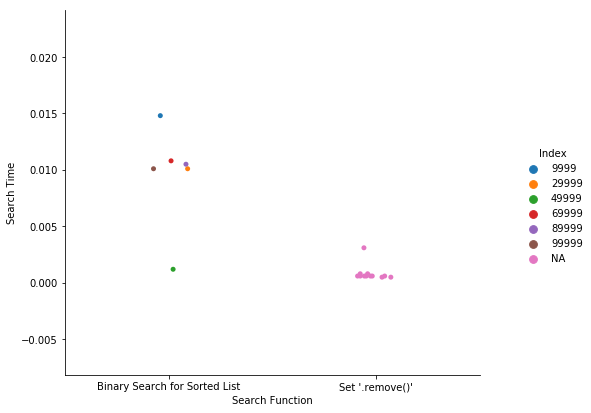

In [42]:
p3 = sns.catplot(x="Search Function", y="Search Time"
            , hue = "Index"
            , data=results_df.loc[results_df['Search Function']!='Linear Search for Unsorted List'])
p3.fig.set_size_inches(9,6)

Now that we're focusing on just binary search and hash function search, it's easier to see differences in run times.  

It's clear that searching for an element in a set (via hash functions) is relatively consistent regardless of which element is being searched for.  

In comparison, search time with binary search is variable depending on where the element is located within the list.  The exact middle element will be quickest to search for as we can see with the green '49,999' index point.  Search times for the other indeces are not perfectly correlated with the number of iterations it takes to find the respective element, but that is likely due to expected variance in the amount of cpu dedicated specifically to the searches (versus other computer functions.)

# VI. Executive Summary

It's clear that using hash functions to find elements in a list/array/set can be:
1. _significantly_ faster than linear search except in the single 'best case' scenario when you're searching for the 1st element, and thus can find the element in one iteration of linear search
2. much faster than binary search except in the single 'best case' scenario when you're searching for the exact middle element, and thus can find the element in one iteration of binary search
3. relatively consistent when searching for different elements, as long as the hash function is designed well